In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

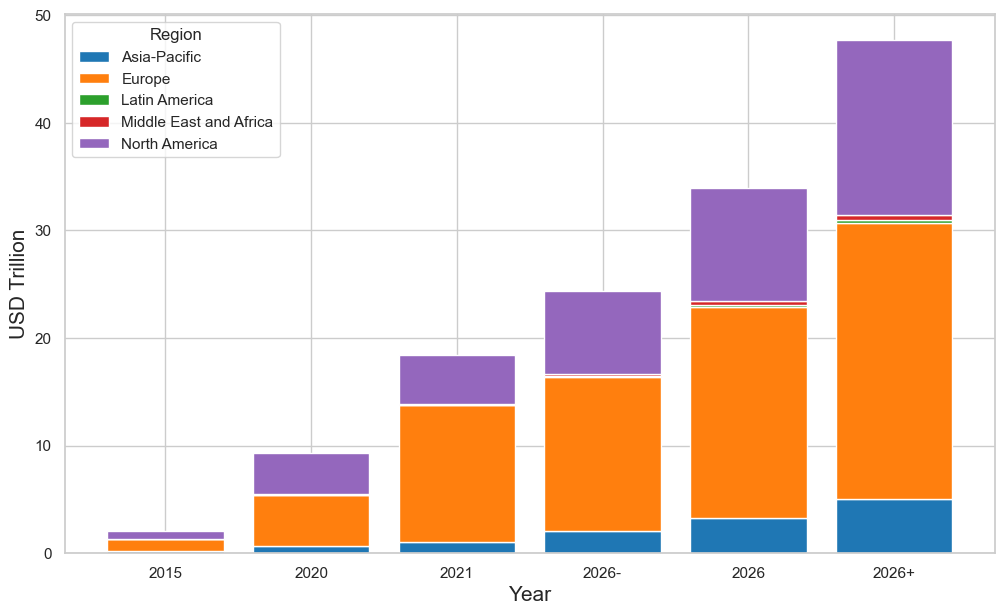

In [3]:
# create the dataframe
data = {'Region': ['Asia-Pacific', 'Europe', 'Latin America', 'Middle East and Africa', 'North America'],
        '2015': [0.2, 1.1, 0.0, 0.0, 0.8],
        '2020': [0.7, 4.7, 0.0, 0.1, 3.8],
        '2021': [1.0, 12.8, 0.0, 0.1, 4.5],
        '2026-': [2.1, 14.3, 0.1, 0.2, 7.7],
        '2026': [3.3, 19.6, 0.2, 0.3, 10.5],
        '2026+': [5.0, 25.7, 0.3, 0.4, 16.3]}

df = pd.DataFrame(data)

# melt the dataframe so that the year columns become a single variable
melted_df = pd.melt(df, id_vars=['Region'], var_name='Year', value_name='Value')

# create a dictionary to map each region to a different color
colors = {'Asia-Pacific': 'tab:blue',
          'Europe': 'tab:orange',
          'Latin America': 'tab:green',
          'Middle East and Africa': 'tab:red',
          'North America': 'tab:purple'}

# create a list of the regions
regions = ['Asia-Pacific', 'Europe', 'Latin America', 'Middle East and Africa', 'North America']

# create a list of bottom values for each year
bottom = [0] * len(melted_df['Year'].unique())

sns.set(rc={'figure.figsize':(12,7)})
sns.set(style="whitegrid")
fig, ax = plt.subplots()
for i, region in enumerate(regions):
    values = melted_df[melted_df['Region'] == region]['Value'].tolist()
    ax.bar(melted_df['Year'].unique(), values, bottom=bottom, color=colors[region], label=region)
    bottom = [sum(x) for x in zip(bottom, values)]

# add labels and title
plt.xlabel("Year", size=15)
plt.ylabel("USD Trillion", size=15)
#plt.title("Stacked Bar Plot", size=18)
plt.legend(title="Region", loc='upper left')

plt.show()
